# Detecting and Removing Outliers👽

As you go along you'll get to know how to discover🔎 outliers statistically and visually, and also how to remove❎ them from your dataset.

The first thing we need to do is to import some relevant libraries.
## Import Libraries 📦

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Dataset 📄
We'll be using `Ames_Housing_Sales.csv` Dataset.

The Ames housing dataset examines features of houses sold in Ames during the 2006–10 timeframe. The goal is to use the training data to predict the sale prices of the houses in the testing data.

In [37]:
data = pd.read_csv('../datasets/Ames_Housing_Sales.csv')
data.head() #this returns top 5 rows of the dataset

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [38]:
# to get descriptive statistics of the dataset
data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,1177.129804,353.424946,3.609862,2.865120,455.578680,48.102248,0.430747,0.058738,570.765047,21.039159,...,6.187092,2.920957,15.945613,6.552574,1074.445975,97.456853,1972.958666,1985.435098,2007.812183,185479.51124
std,387.014961,439.553171,30.154682,0.783961,459.691379,164.324665,0.514052,0.238285,443.677845,60.535107,...,1.345780,41.335545,57.249593,1.589821,436.371874,126.699192,29.379883,20.444852,1.330221,79023.89060
min,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1880.000000,1950.000000,2006.000000,35311.00000
25%,894.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,228.000000,0.000000,...,5.000000,0.000000,0.000000,5.000000,810.000000,0.000000,1955.000000,1968.000000,2007.000000,134000.00000
50%,1098.000000,0.000000,0.000000,3.000000,400.000000,0.000000,0.000000,0.000000,476.000000,0.000000,...,6.000000,0.000000,0.000000,6.000000,1008.000000,0.000000,1976.000000,1994.000000,2008.000000,167500.00000
75%,1414.000000,738.500000,0.000000,3.000000,732.000000,0.000000,1.000000,0.000000,811.000000,0.000000,...,7.000000,0.000000,0.000000,7.000000,1314.000000,171.000000,2001.000000,2004.000000,2009.000000,217750.00000
max,4692.000000,2065.000000,508.000000,6.000000,5644.000000,1474.000000,2.000000,2.000000,2336.000000,552.000000,...,10.000000,738.000000,480.000000,12.000000,6110.000000,857.000000,2010.000000,2010.000000,2010.000000,755000.00000


👀 Look for the `mean`, `min`, `25%`, `50%`, `75%`, and `max` row variables for the very first columns `1stFlrSF`.
- `25%` data  falls below `894.00`
- `50%` data falls below `1098.00`
- `75%` data falls below `1414.00`
The `max` value of the variable is `4692.00` which is far from the `mean` value of `1177.12`. It is not that far but still.

Now we can't go and check each column one by one. So we'll some approach to detect them.

## Set up separate variables for features and target

In [39]:
target_col = "SalePrice"

X = data.drop(target_col, axis=1) # features
y = data[target_col] # target

## Discover Outlier 🔎
### Discover outliers statistically 📈

Using IQR (Inter Quartile Range) to find the outliers, which is the most commonly used and most trusted approach.

In [40]:
# create a list of numeric columns
numeric_mask = X.dtypes != np.object
numeric_cols = X.columns[numeric_mask]
numeric_cols

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

Now that we've list of numeric columns, for every column calculate IQR (Inter Quartile Range), and identify the outliers.

In [41]:
for col in numeric_cols:
    # Calculate the IQR (Inter Quartile Range)
    Q1 = np.percentile(X[col], 25, interpolation = 'midpoint')
    Q3 = np.percentile(X[col], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    # Min-max limit to be considered as an outlier
    min = Q1-1.5*IQR
    max = Q3+1.5*IQR
    
    # Identify the points
    outliers = [x for x in X[col] if x > max or x < min]
    print(col,' : ',outliers)

1stFlrSF  :  [2207.0, 2223.0, 2259.0, 2234.0, 2392.0, 2402.0, 3228.0, 3138.0, 2515.0, 2444.0, 2217.0, 2364.0, 2898.0, 2524.0, 2411.0, 2196.0, 4692.0, 2633.0]
2ndFlrSF  :  [1872.0, 2065.0]
3SsnPorch  :  [320.0, 407.0, 130.0, 180.0, 168.0, 180.0, 140.0, 508.0, 238.0, 245.0, 196.0, 144.0, 144.0, 182.0, 168.0, 162.0, 23.0, 168.0, 216.0, 96.0, 216.0, 153.0, 290.0, 304.0]
BedroomAbvGr  :  [0, 5, 5, 6, 0, 5, 5, 6, 6, 5, 0, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 0, 0, 5, 0, 5, 6, 5, 5]
BsmtFinSF1  :  [1880.0, 1904.0, 2260.0, 2188.0, 2096.0, 5644.0]
BsmtFinSF2  :  [32.0, 668.0, 486.0, 93.0, 491.0, 506.0, 712.0, 362.0, 41.0, 169.0, 869.0, 150.0, 670.0, 28.0, 1080.0, 768.0, 215.0, 374.0, 208.0, 441.0, 184.0, 279.0, 306.0, 180.0, 712.0, 580.0, 690.0, 692.0, 228.0, 125.0, 1063.0, 620.0, 175.0, 820.0, 1474.0, 264.0, 479.0, 147.0, 232.0, 380.0, 544.0, 294.0, 258.0, 121.0, 180.0, 391.0, 531.0, 344.0, 539.0, 713.0, 210.0, 311.0, 1120.0, 165.0, 532.0, 279.0, 96.0, 495.0, 180.0, 174.0, 1127.0, 139.0, 202.0, 645.0

### Discover outliers with visualization tools 📊
You can discover outliers visually using box plot, scatter plot, histogram density plot. Here's 👇 how you can discover outliers using box plot

<AxesSubplot:xlabel='BsmtFinSF1'>

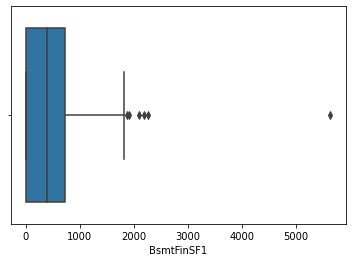

In [42]:
# plotting for the column "BsmtFinSF1"
sns.boxplot(data['BsmtFinSF1'])

In the above graph, values above 2000 are acting as outliers.

## Remove Outliers ❎

Let's try removing outliers and see how it's affecting our prediction.

In [43]:
# Copy of the data
data_ro = data.copy()

Q1 = data_ro.quantile(0.25)
Q3 = data_ro.quantile(0.75)
IQR = Q3 - Q1

data_ro = data_ro[~((data_ro < (Q1 - 1.5 * IQR)) |(data_ro > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Old Shape: ", data.shape)
print("New Shape: ", data_ro.shape)

Old Shape:  (1379, 80)
New Shape:  (546, 80)


Nearly half of the observation got removed.
Now we'll fit a basic linear regression model and also calculate R2 Score.

## Set up separate variables for features and target for dataframe with no outlier

In [44]:
X_ro = data_ro[numeric_cols] # also removing categorical data
y_ro = data_ro['SalePrice']

## Create train and test splits ⚔️
### For datasets with outliers

In [45]:
# drop categorical data
X = X[numeric_cols]

In [46]:
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # splits train and test in 7:3 ratio

### For datasets with no outliets

In [47]:
X_train_ro, X_test_ro, y_train_ro, y_test_ro = train_test_split(X_ro, y_ro, test_size=0.3) # splits train and test in 7:3 ratio

## Fit Linear Regression Model and calculate the R2 Score

In [48]:
# import linear regression and create an instance of it
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [49]:
# import r2 score
from sklearn.metrics import r2_score

In [50]:
# Storage for R2 Scores
r2_score_df = list()

# Old Data with outliers
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train) # using train data
y_test_pred = LR.predict(X_test) # using test data

r2_score_df.append(pd.Series({'train': r2_score(y_train.values, y_train_pred),
                           'test' : r2_score(y_test.values,  y_test_pred)},
                           name='with outliers'))

# Data with no outliers
LR = LR.fit(X_train_ro, y_train_ro)
y_train_ro_pred = LR.predict(X_train_ro) # using train data
y_test_ro_pred = LR.predict(X_test_ro) # using test data

r2_score_df.append(pd.Series({'train': r2_score(y_train_ro.values, y_train_ro_pred),
                           'test' : r2_score(y_test_ro.values,  y_test_ro_pred)},
                          name='with no outliers'))

# Assemble the results
r2_score_df = pd.concat(r2_score_df, axis=1)
r2_score_df

,with outliers,with no outliers
train,0.813437,0.912683
test,0.792328,0.861805


On the data with outliers, we're getting scores of `0.813437` and `0.792328` for the train and test data. And on the data with no outliers, we're getting scores of `0.912683` and `0.861805` for the train and test data. And We can say that removing outliers did improve the performance of the linear regression model.

# Export Data Frame with no Outliers

We'll be exporting the dataframe with no Outliers so that we can use it in future

In [51]:
# exporting
data_ro.to_csv("../datasets/Ames_Housing_Sales_RO.csv", index=False)